### Create the Decision Tree classifier and visualize it graphically. 
#### The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. 

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns


In [2]:
# read file from Github repo
file = 'https://raw.githubusercontent.com/AjayBhonsle/TSF/master/Task%206/Iris.csv'
df1 = pd.read_csv(file)
df1

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

In [3]:
# check for null values
df1.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
# drop un-necessary column
df2 = df1.drop(['Id'],axis='columns')
df2.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
x = df2[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
columns = x.columns.tolist()
x = x.values
y = df2[['Species']].values

#### Building decision tree model

In [6]:
from sklearn.tree import DecisionTreeClassifier 

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,random_state=0)

from sklearn import metrics
clf = DecisionTreeClassifier()

decisionModel = clf.fit(xtrain,ytrain)
decisionModel.score(xtrain, ytrain)

1.0

In [7]:
# predict thre response for test dataset
ypred = decisionModel.predict(xtest)
ypred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

#### Evaluating model

In [8]:
accuracy = metrics.accuracy_score(ytest, ypred)
print('Accuracy : ',round(accuracy*100,4), '%')

Accuracy :  97.3684 %


In [9]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



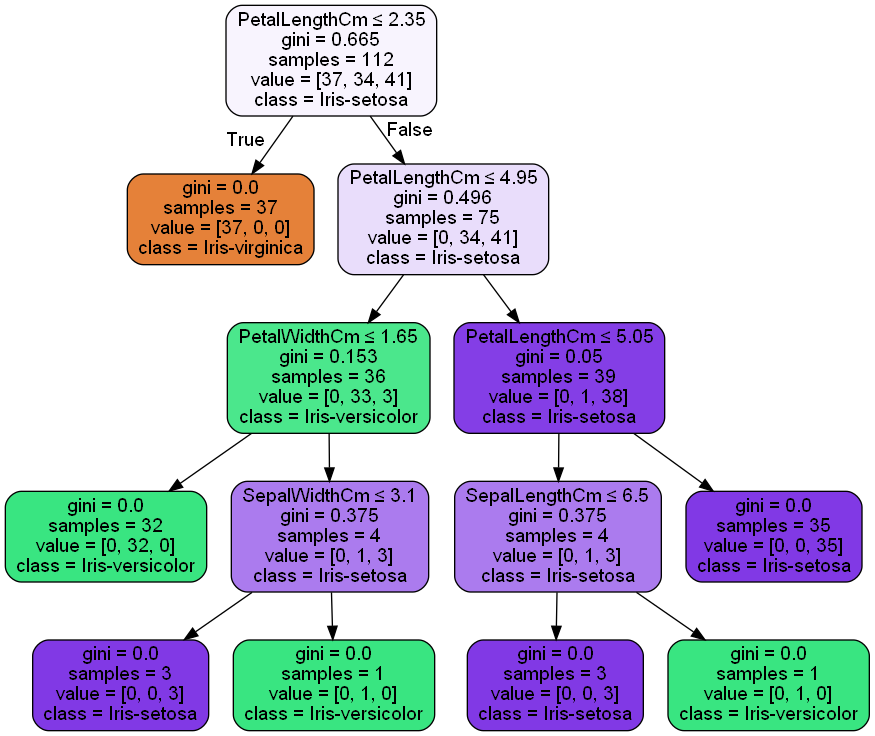

In [15]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
# export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png


dot_data = StringIO()
export_graphviz(decisionModel, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = columns,
                class_names=['Iris-virginica', 'Iris-versicolor', 'Iris-setosa'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('decision_gini.png')
Image(graph.create_png())

## Optimizing Decision Tree Performance
Using the Entropy

In [11]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(xtrain,ytrain)

#Predict the response for test dataset
y_pred = clf.predict(xtest)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

Accuracy: 0.9736842105263158


In [12]:
accuracy = metrics.accuracy_score(ytest, ypred)
print('Accuracy : ',round(accuracy*100,4), '%')

Accuracy :  97.3684 %


In [13]:
print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



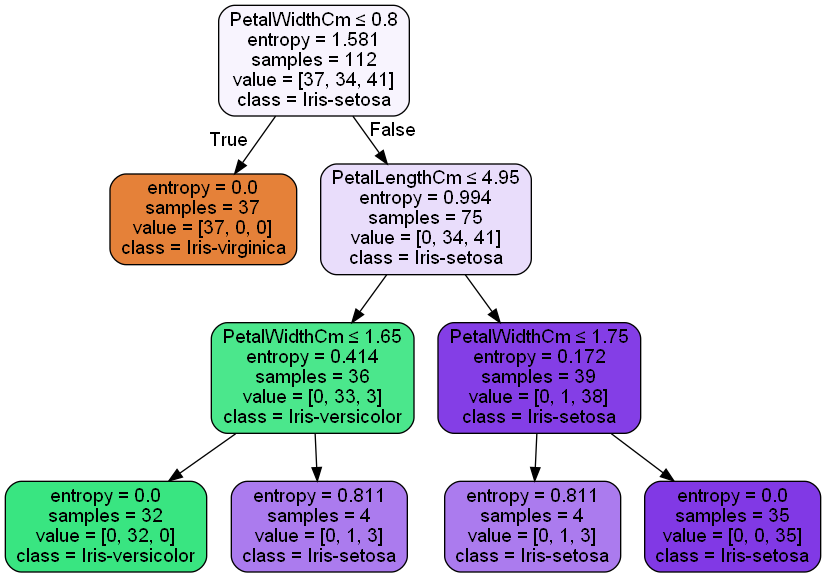

In [14]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = columns,class_names=['Iris-virginica', 'Iris-versicolor', 'Iris-setosa'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_entropy.png')
Image(graph.create_png())